<a href="https://colab.research.google.com/github/hsnbnaa/deep-learning-is-easy/blob/main/Week%202/Google%20Colab/Tugas_Week_2_Classification_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from collections import Counter
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, roc_curve, auc
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import gzip
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from itertools import cycle
from tabulate import tabulate

# Classification Model

## Data Exploring

In [ ]:
data = pd.read_csv('covert.gz', compression='gzip')

In [ ]:
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,1,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,1,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,1,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,1,0,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Soil_Type1                          581012 non-null 

In [ ]:
data.duplicated().sum()

0

<Axes: >

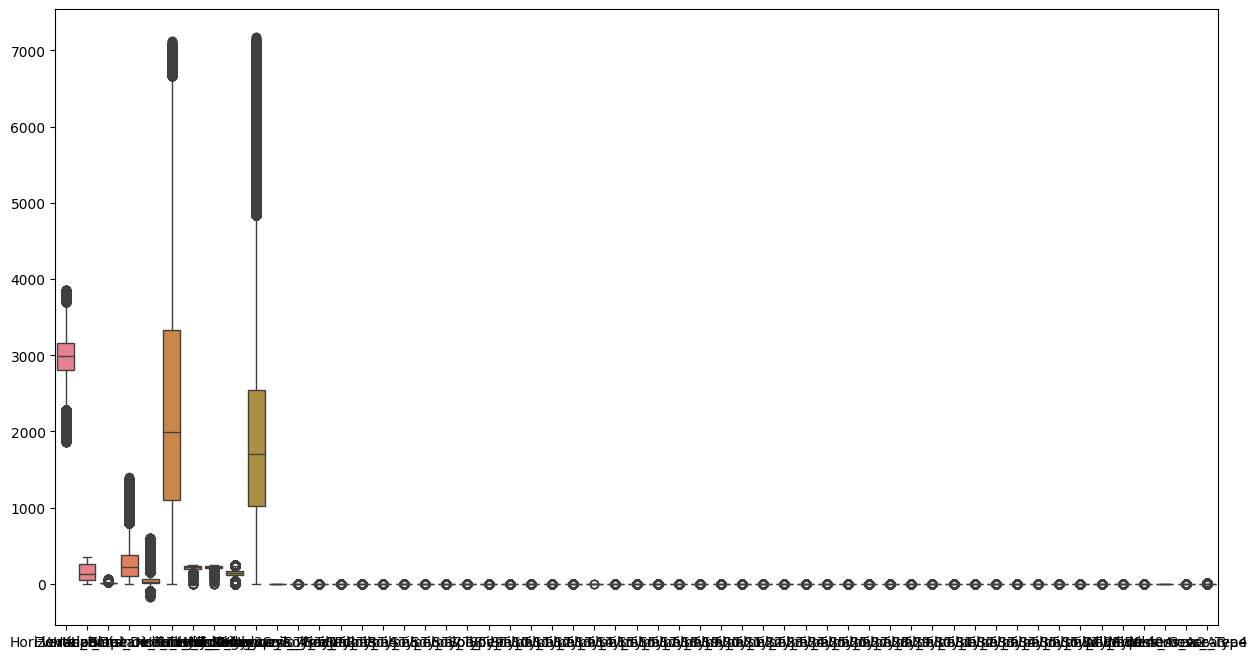

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data)

In [ ]:
data.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,...,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,0.238164,0.066550,-0.619374,-0.269554
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,...,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.055988,0.074904,0.082687,0.017080
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,...,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,-0.036253,0.125663,0.255503,0.148285
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,...,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,0.055726,0.122028,-0.100433,-0.020317
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,...,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,-0.008709,0.146839,0.077792,0.081664
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,...,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052,-0.200411,-0.232933,-0.270349,-0.153450
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,...,0.027870,0.007865,0.010332,0.015108,-0.029620,-0.000016,-0.006181,-0.100565,-0.200282,-0.035415
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,...,0.005863,0.016239,-0.022707,0.042952,-0.071961,-0.040176,0.042392,0.048646,-0.195733,-0.096426
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,...,-0.016482,0.001330,-0.022064,0.022187,-0.029040,-0.024254,0.034707,0.090757,0.018860,-0.048290
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,...,-0.000081,-0.010595,0.004180,-0.019740,-0.003301,0.008915,0.027473,-0.277510,-0.236548,-0.108936


## Pre-processing Data

In [ ]:
y = data['Cover_Type']
X = data.drop('Cover_Type', axis=1)

In [ ]:
Counter(y)

Counter({5: 9493, 2: 283301, 1: 211840, 7: 20510, 3: 35754, 6: 17367, 4: 2747})

In [ ]:
undersample = RandomUnderSampler(sampling_strategy={1: 40000, 2: 40000})
X_under, y_under = undersample.fit_resample(X, y)

oversample = SMOTE(sampling_strategy={3: 40000, 4: 40000, 5: 40000, 6: 40000, 7: 40000})
X_resampled, y_resampled = oversample.fit_resample(X_under, y_under)

Counter(y_resampled)

Counter({1: 40000, 2: 40000, 3: 40000, 4: 40000, 5: 40000, 6: 40000, 7: 40000})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
y_train = y_train - 1
y_test = y_test - 1

In [ ]:
Counter(y_train)

Counter({3: 31994, 1: 31967, 5: 31978, 0: 32065, 4: 31955, 2: 32096, 6: 31945})

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Tensorflow Model

In [ ]:
inputs = tf.keras.Input(shape=(X_train.shape[1], ))
hidden = tf.keras.layers.Dense(256, activation='relu')(inputs)
hidden = tf.keras.layers.Dense(128, activation='relu')(hidden)
hidden = tf.keras.layers.Dense(64, activation='relu')(hidden)
outputs = tf.keras.layers.Dense(7, activation='softmax')(hidden)

tf_model = tf.keras.Model(inputs, outputs)

eearly_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

tf_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

tf_model.fit(
    X_train,
    y_train,
    validation_split=0.15,
    batch_size=128,
    epochs=100,
    callbacks=[early_stopping]
)


Epoch 1/100
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7135 - loss: 0.7187 - val_accuracy: 0.8127 - val_loss: 0.4605
Epoch 2/100
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8240 - loss: 0.4300 - val_accuracy: 0.8443 - val_loss: 0.3921
Epoch 3/100
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8545 - loss: 0.3595 - val_accuracy: 0.8680 - val_loss: 0.3308
Epoch 4/100
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8751 - loss: 0.3146 - val_accuracy: 0.8830 - val_loss: 0.2974
Epoch 5/100
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8891 - loss: 0.2814 - val_accuracy: 0.8911 - val_loss: 0.2863
Epoch 6/100
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8989 - loss: 0.2605 - val_accuracy: 0.8983 - val_loss: 0.2621
Epoch 7/100
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9077 - loss: 0.2408 - val_accuracy: 0.9021 - val_loss: 0.2532
Epoch 8/100
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9128 - los

1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


<Axes: >

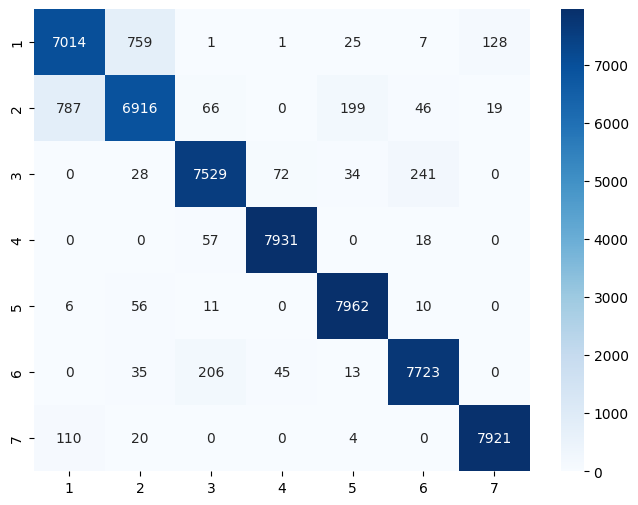

In [ ]:
y_pred_probs = tf_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

y_pred = y_pred + 1
y_test = y_test + 1

cm = confusion_matrix(y_test, y_pred)

tf_acc = accuracy_score(y_test, y_pred)
tf_precision = precision_score(y_test, y_pred, average='weighted')
tf_recall = recall_score(y_test, y_pred, average='weighted')
tf_f1 = f1_score(y_test, y_pred, average='weighted')
tf_roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')
# Visualisasi dengan Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

# print(f"\nAccuracy: {acc:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}\nROC AUC Score: {roc_auc:.4f}")

In [ ]:
y_test = y_test - 1

Unique labels in y_test: [0 1 2 3 4 5 6]


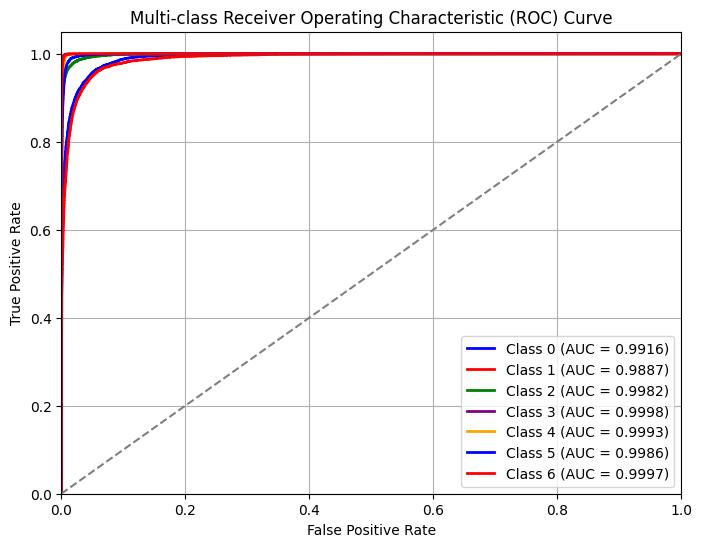

In [ ]:
# Cek apakah probabilitas sudah benar
y_pred_probs = y_pred_probs / np.sum(y_pred_probs, axis=1, keepdims=True)

# Cek apakah jumlah kelas sesuai
n_classes = y_pred_probs.shape[1]
print("Unique labels in y_test:", np.unique(y_test))

# Konversi ke One-vs-Rest
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Warna berbeda untuk tiap kelas
colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])

plt.figure(figsize=(8, 6))

# Loop untuk menghitung ROC Curve tiap kelas
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i} (AUC = {roc_auc:.4f})')

# Garis diagonal referensi
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# PyTorch Model

In [ ]:
X_train.shape

(224000, 54)

In [ ]:
y_test.unique()

tensor([0, 1, 2, 3, 4, 5, 6])

In [ ]:
class SimpleClassification(nn.Module):
  def __init__(self):
    super(SimpleClassification, self).__init__()
    self.layer1 = nn.Linear(X_train.shape[1], 256)
    self.layer2 = nn.Linear(256, 128)
    self.layer3 = nn.Linear(128, 64)
    self.out = nn.Linear(64, 7)
  def forward(self, x):
    x = F.relu(self.layer1(x))
    x = F.relu(self.layer2(x))
    x = F.relu(self.layer3(x))
    x = self.out(x)
    return x

classy = SimpleClassification()

In [ ]:
y_train

array([3, 3, 1, ..., 5, 6, 4])

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

In [ ]:
optimizer = optim.Adam(classy.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [ ]:
y_train.dtype

torch.int64

In [ ]:
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

best_loss = float('inf')
patience = 5
counter = 0

for epoch in range(1, 100):
  classy.train()
  total_loss=0
  for x, target in train_loader:
    optimizer.zero_grad()
    output=classy(x)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()

  avg_loss = total_loss / len(train_loader)
  if epoch % 10 == 0:
    print(f'Epoch: {epoch}, Loss: {avg_loss:.4f}')

  if avg_loss < best_loss:
    best_loss = avg_loss
    best_model = classy.state_dict()
    counter = 0
  else:
    counter += 1
    if counter >= patience:
        print(f"Early stopping at epoch {epoch}")
        classy.load_state_dict(best_model)
        break

Epoch: 10, Loss: 0.2152
Epoch: 20, Loss: 0.1594
Epoch: 30, Loss: 0.1333
Epoch: 40, Loss: 0.1168
Epoch: 50, Loss: 0.1055
Epoch: 60, Loss: 0.0965
Epoch: 70, Loss: 0.0881
Epoch: 80, Loss: 0.0845
Epoch: 90, Loss: 0.0802


In [ ]:
classy.eval()

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=True)

y_pred_probs = []
y_actual = []

with torch.no_grad():
  for x, target in test_loader:
    output = classy(x)
    probabilities = F.softmax(output, dim=1).numpy()
    y_pred_probs.extend(probabilities)
    y_actual.extend(target.numpy())
    loss = criterion(output, target)
    total_loss += loss.item()



<Axes: >

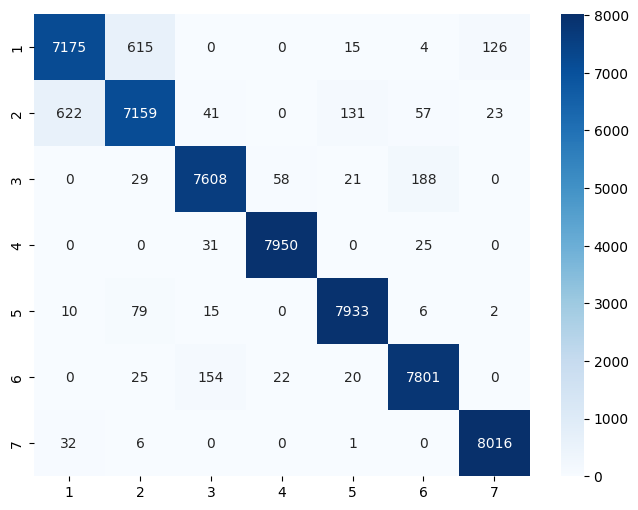

In [ ]:
y_pred = np.argmax(y_pred_probs, axis=1) + 1
y_actual = np.array(y_actual) + 1

cm = confusion_matrix(y_actual, y_pred)

tensor_accuracy = accuracy_score(y_actual, y_pred)
tensor_precision = precision_score(y_actual, y_pred, average='weighted')
tensor_recall = recall_score(y_actual, y_pred, average='weighted')
tensor_f1 = f1_score(y_actual, y_pred, average='weighted')
tensor_roc = roc_auc_score(y_actual, y_pred_probs, multi_class='ovr')

# # Visualisasi dengan Seaborn
# print(f"Accuracy: {accuracy:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1 Score: {f1:.4f}")
# print(f"ROC AUC Score: {roc:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_actual), yticklabels=np.unique(y_actual))

In [ ]:
y_actual = y_actual - 1

Unique labels in y_test: [0 1 2 3 4 5 6]


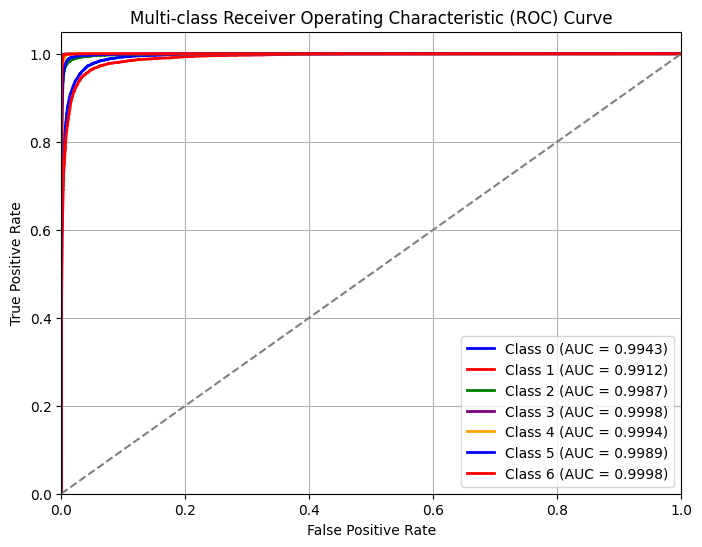

In [ ]:
# Cek apakah probabilitas sudah benar
y_pred_probs = y_pred_probs / np.sum(y_pred_probs, axis=1, keepdims=True)

# Cek apakah jumlah kelas sesuai
n_classes = y_pred_probs.shape[1]
print("Unique labels in y_test:", np.unique(y_test))

# Konversi ke One-vs-Rest
y_test_bin = label_binarize(y_actual, classes=np.arange(n_classes))

# Warna berbeda untuk tiap kelas
colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])

plt.figure(figsize=(8, 6))

# Loop untuk menghitung ROC Curve tiap kelas
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i} (AUC = {roc_auc:.4f})')

# Garis diagonal referensi
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Result Classification

In [ ]:
# Data hasil evaluasi model
data = [
    ["Accuracy", tf_acc, tensor_accuracy],
    ["Precision", tf_precision, tensor_precision],
    ["Recall", tf_recall, tensor_recall],
    ["F1 Score", tf_f1, tensor_f1],
    ["AUC", tf_roc_auc, tensor_roc]
]

# Buat tabel
headers = ["Metric", "TensorFlow", "PyTorch"]
table = tabulate(data, headers=headers, tablefmt="grid")

print(table)

+-----------+--------------+-----------+
| Metric    |   TensorFlow |   PyTorch |
+===========+==============+===========+
| Accuracy  |     0.946357 |  0.957893 |
+-----------+--------------+-----------+
| Precision |     0.945991 |  0.957622 |
+-----------+--------------+-----------+
| Recall    |     0.946357 |  0.957893 |
+-----------+--------------+-----------+
| F1 Score  |     0.946129 |  0.957732 |
+-----------+--------------+-----------+
| AUC       |     0.996554 |  0.99743  |
+-----------+--------------+-----------+


# Description Clasification

## 📌 Persamaan Matematika dan Perbandingan Model

### 🔢 Persamaan Metrik Evaluasi

#### 1️⃣ Accuracy
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$
Mengukur seberapa sering model memprediksi dengan benar.

#### 2️⃣ Precision
$$
Precision = \frac{TP}{TP + FP}
$$
Menunjukkan berapa banyak dari prediksi positif yang benar.

#### 3️⃣ Recall (Sensitivity)
$$
Recall = \frac{TP}{TP + FN}
$$
Mengukur seberapa banyak sampel positif yang berhasil dideteksi oleh model.

#### 4️⃣ F1 Score
$$
F1\ Score = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$
Merupakan rata-rata harmonik antara Precision dan Recall.

#### 5️⃣ AUC (Area Under Curve)
AUC mengukur area di bawah kurva **ROC (Receiver Operating Characteristic)** dan menunjukkan seberapa baik model membedakan antara kelas positif dan negatif.

---

### 📊 Perbandingan Model (TensorFlow vs PyTorch)

| **Metric**    | **TensorFlow** | **PyTorch** | **Model Lebih Baik** |
|--------------|--------------|------------|----------------|
| **Accuracy**  | 0.946357     | 0.957893   | **PyTorch** (lebih tinggi) |
| **Precision** | 0.945991     | 0.957622   | **PyTorch** (lebih tinggi) |
| **Recall**    | 0.946357     | 0.957893   | **PyTorch** (lebih tinggi) |
| **F1 Score**  | 0.946129     | 0.957732   | **PyTorch** (lebih tinggi) |
| **AUC**       | 0.996554     | 0.99743    | **PyTorch** (lebih tinggi) |

📌 **Kesimpulan**:
- **Secara keseluruhan, PyTorch memiliki performa yang lebih baik dibandingkan PyTorch** karena memiliki keunggulan dalam **lebih banyak metrik**.
